Enter inflow rate (0-10): 1
Enter outflow rate (0-10): 1
Enter current water level (0-100): 10
Control Signal: 25.000000000000004


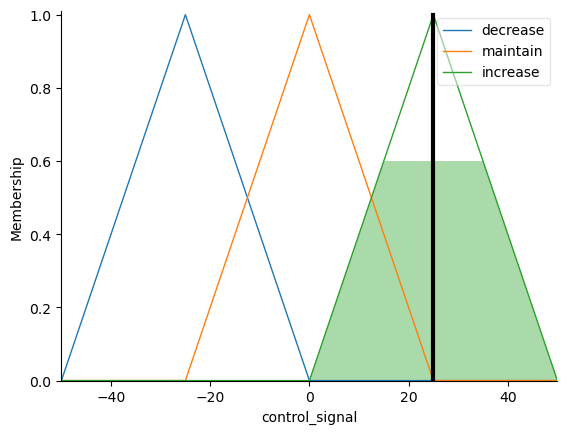

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse for each variable
inflow_rate = ctrl.Antecedent(np.arange(0, 11, 1), 'inflow_rate')
outflow_rate = ctrl.Antecedent(np.arange(0, 11, 1), 'outflow_rate')
current_level = ctrl.Antecedent(np.arange(0, 101, 1), 'current_level')
control_signal = ctrl.Consequent(np.arange(-50, 51, 1), 'control_signal')

# Define custom membership functions
inflow_rate['very_low'] = fuzz.trimf(inflow_rate.universe, [0, 0, 2.5])
inflow_rate['low'] = fuzz.trimf(inflow_rate.universe, [2, 3.5, 5])
inflow_rate['moderate'] = fuzz.trimf(inflow_rate.universe, [4.5, 5.5, 6.5])
inflow_rate['high'] = fuzz.trimf(inflow_rate.universe, [6, 7.5, 9])
inflow_rate['very_high'] = fuzz.trimf(inflow_rate.universe, [8.5, 10, 10])

outflow_rate['very_low'] = fuzz.trimf(outflow_rate.universe, [0, 0, 2.5])
outflow_rate['low'] = fuzz.trimf(outflow_rate.universe, [2, 3.5, 5])
outflow_rate['moderate'] = fuzz.trimf(outflow_rate.universe, [4.5, 5.5, 6.5])
outflow_rate['high'] = fuzz.trimf(outflow_rate.universe, [6, 7.5, 9])
outflow_rate['very_high'] = fuzz.trimf(outflow_rate.universe, [8.5, 10, 10])

current_level['very_low'] = fuzz.trimf(current_level.universe, [0, 0, 25])
current_level['low'] = fuzz.trimf(current_level.universe, [20, 25, 50])
current_level['moderate'] = fuzz.trimf(current_level.universe, [45, 50, 55])
current_level['high'] = fuzz.trimf(current_level.universe, [50, 75, 100])
current_level['very_high'] = fuzz.trimf(current_level.universe, [75, 100, 100])

control_signal['decrease'] = fuzz.trimf(control_signal.universe, [-50, -25, 0])
control_signal['maintain'] = fuzz.trimf(control_signal.universe, [-25, 0, 25])
control_signal['increase'] = fuzz.trimf(control_signal.universe, [0, 25, 50])

# Define rules
rule1 = ctrl.Rule(inflow_rate['very_low'] | outflow_rate['very_high'], control_signal['increase'])
rule2 = ctrl.Rule(inflow_rate['very_high'] & current_level['very_low'], control_signal['decrease'])
rule3 = ctrl.Rule(outflow_rate['very_low'] & current_level['very_high'], control_signal['maintain'])
rule4 = ctrl.Rule(inflow_rate['very_high'] & current_level['low'], control_signal['increase'])
rule5 = ctrl.Rule(outflow_rate['very_low'] & current_level['very_high'], control_signal['decrease'])
rule6 = ctrl.Rule(inflow_rate['moderate'] & outflow_rate['moderate'], control_signal['maintain'])
rule7 = ctrl.Rule(inflow_rate['low'] & current_level['very_low'], control_signal['increase'])
rule8 = ctrl.Rule(outflow_rate['high'] & current_level['high'], control_signal['decrease'])
rule9 = ctrl.Rule(inflow_rate['very_low'] & outflow_rate['very_high'], control_signal['maintain'])

# Create control system and simulation
control_rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]
water_level_ctrl = ctrl.ControlSystem(control_rules)
water_level = ctrl.ControlSystemSimulation(water_level_ctrl)

# User input
inflow_input = float(input("Enter inflow rate (0-10): "))
outflow_input = float(input("Enter outflow rate (0-10): "))
current_level_input = float(input("Enter current water level (0-100): "))

# Setting the inputs
water_level.input['inflow_rate'] = inflow_input
water_level.input['outflow_rate'] = outflow_input
water_level.input['current_level'] = current_level_input

# Crunch the numbers
water_level.compute()

print(f"Control Signal: {water_level.output['control_signal']}")
control_signal.view(sim=water_level)
plt.show()  # This will display the plot inline within the Jupyter Notebook cell